<a href="https://colab.research.google.com/github/IvanYonathan/Detecting-Brain-Tumor-with-Machine-Learning/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import and Shuffle the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn import preprocessing
from warnings import filterwarnings
import os
import cv2
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
path = os.listdir('../content/drive/My Drive/Brain T/')
classes = {'no':0, 'yes':1}

import random

# data set
data_x = []
data_y = []


test_x = []
test_y = []

data = []

for cls in classes:
    pth = '/content/drive/My Drive/Brain T/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        img = cv2.resize(img, (200, 200))
        data.append((img, classes[cls]))

# Shuffle the data for the current class
random.shuffle(data)

# Define the class names
class_names = ['Tumor', 'No Tumor']

# Count the number of samples in each class
class_counts = {}
for _, cls in data:
    if cls in class_counts:
        class_counts[cls] += 1
    else:
        class_counts[cls] = 1

# Plot the bar chart
plt.bar(class_names, class_counts.values())
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [ ]:
# Split the data into train and test sets
images, labels = zip(*data)
data_images, test_images, data_labels, test_labels = train_test_split(images, labels, test_size=0.01, random_state=42)

# Append the shuffled data,test to the main lists
data_x.extend(data_images)
data_y.extend(data_labels)

test_x.extend(test_images)
test_y.extend(test_labels)
print(test_y)

print('Data set size : ',len(data_x))
print('Test set size : ',len(test_x))

[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]
Data set size :  2970
Test set size :  30


**Prepare data**

In [ ]:
data_x = np.array(data_x)
data_y = np.array(data_y)

data_x_updated = data_x.reshape(len(data_x), -1)
data_x_updated.shape

xtrain, xtest, ytrain, ytest = train_test_split(data_x_updated, data_y, random_state=10,
                                               test_size=.20)
xtrain.shape, xtest.shape

((2376, 40000), (594, 40000))

**Feature scaling**

In [ ]:
# AS we can see, x_train & x_test are not scale
print(xtrain)
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

# Scaling the dataset
scaler = preprocessing.MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
print(xtrain)

**Drawing metrics function**

In [ ]:
def plot_metrics(ytest,pred):
    cm = confusion_matrix(ytest, pred)
    # Compute classification report
    report = classification_report(ytest, pred)
    #  report
    print('\n',report,'\n','_'*230,'\n\n')


    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(ytest, pred)
    roc_auc = auc(fpr, tpr)

    # Plot confusion matrix, classification report, and ROC curve
    plt.figure(figsize=(15, 5))

    # Plot confusion matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix", {'fontsize': 20},y=1.3)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Plot ROC curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='r', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)', {'fontsize': 20},y=1.3)
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

**Logistic Rgression**

Training

In [ ]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Training the dataset
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


pred = lg.predict(xtest)

Confusion matrix , Classification Report , ROC Curves

In [ ]:
plot_metrics(ytest,pred)

Visualize the process

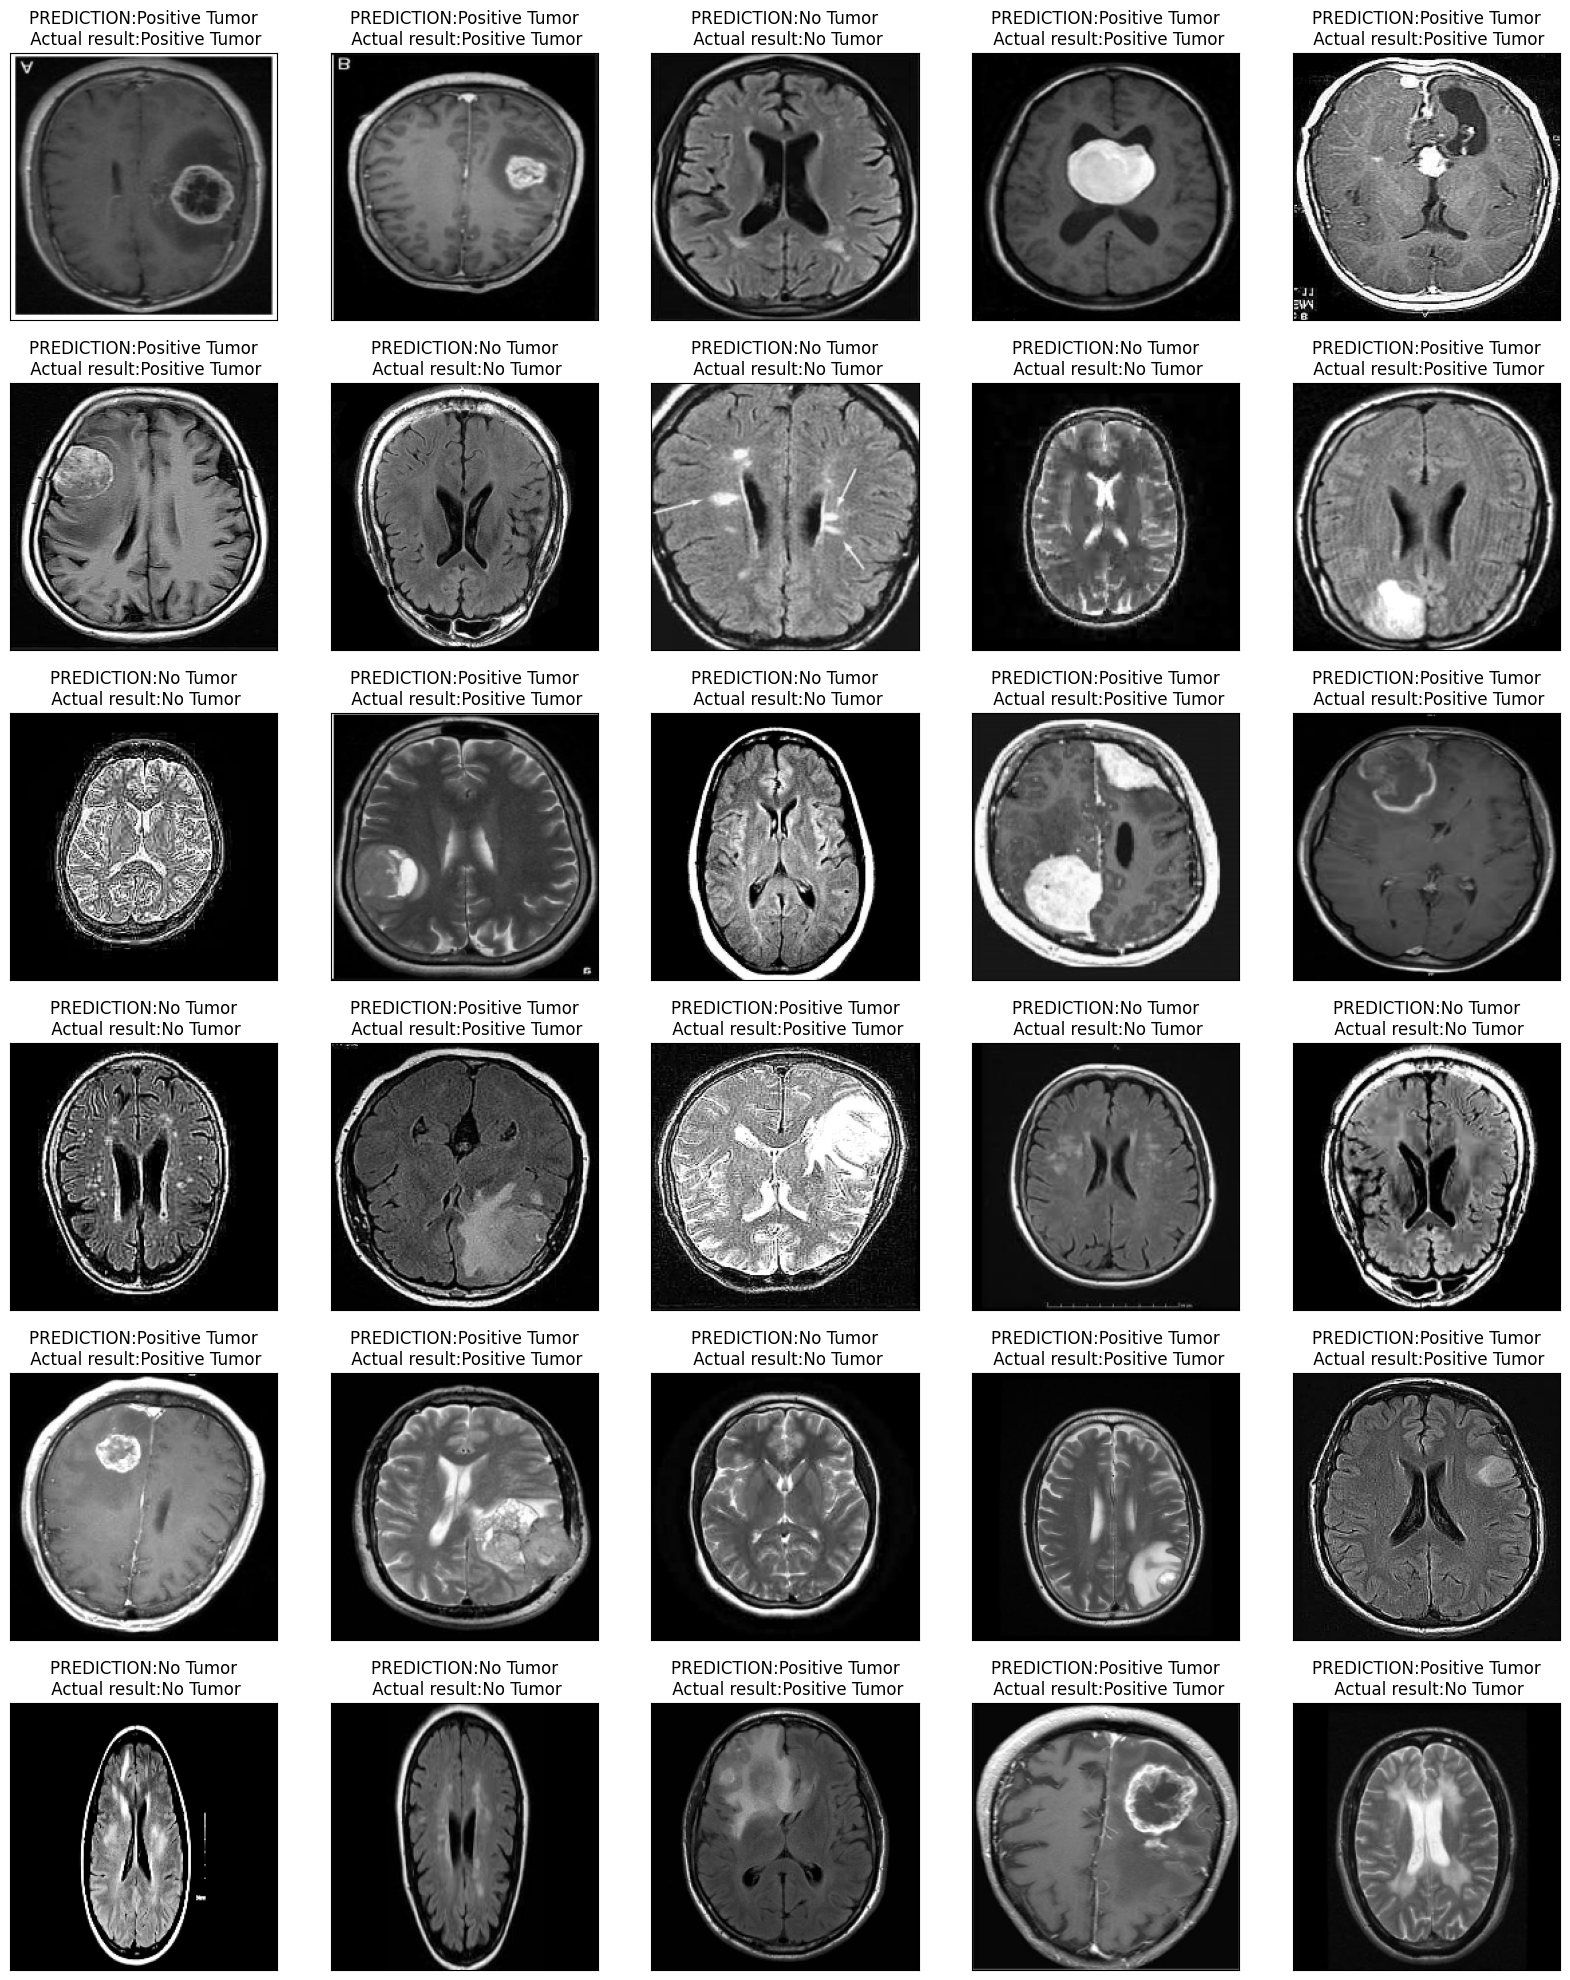

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

fig, axes = plt.subplots(nrows=6,
                         ncols=5,
                         figsize=(20, 25),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
       img1 = test_x[i].reshape(1,-1)/255
       p = lg.predict(img1)
       ax.imshow(test_x[i],cmap='gray')
       ax.set_title(f"PREDICTION:{dec[p[0]]}\n Actual result:{dec[test_y[i]]}")



**SVC Model**

Training and getting report

In [ ]:
from sklearn.svm import SVC

# Training the dataset
sv = SVC()
sv.fit(xtrain, ytrain)

# Evaluation
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

# Prediction
pred = sv.predict(xtest)

Training Score: 0.984006734006734
Testing Score: 0.9646464646464646


Confusion matrix, Classification report, ROC curves


               precision    recall  f1-score   support

           0       0.97      0.96      0.97       308
           1       0.96      0.97      0.96       286

    accuracy                           0.96       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594
 
 ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________ 




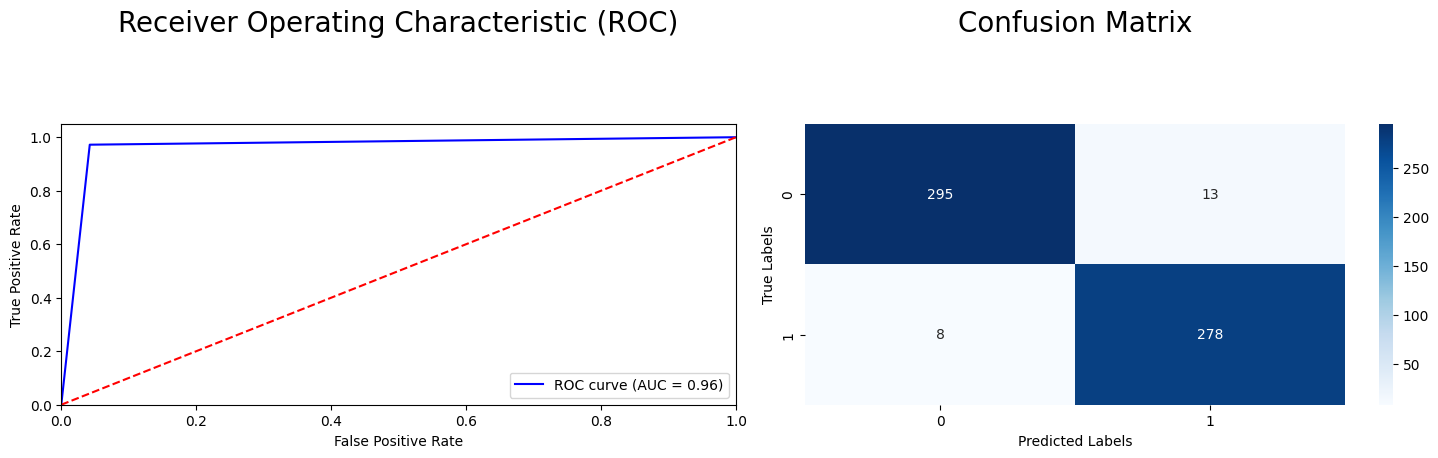

In [ ]:
plot_metrics(ytest,pred)

Visualize the process

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

fig, axes = plt.subplots(nrows=6,
                         ncols=5,
                         figsize=(20, 25),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
       img1 = test_x[i].reshape(1,-1)/255
       p = sv.predict(img1)
       ax.imshow(test_x[i],cmap='gray')
       ax.set_title(f"PREDICTION:{dec[p[0]]}\n Actual result:{dec[test_y[i]]}")

**kNN**

Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# train the dataset
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xtrain, ytrain)
# Prediction
pred = knn_model.predict(xtest)

Confusion matrix, Classification report, ROC curves


               precision    recall  f1-score   support

           0       0.91      0.99      0.95       308
           1       0.99      0.89      0.94       286

    accuracy                           0.94       594
   macro avg       0.95      0.94      0.94       594
weighted avg       0.95      0.94      0.94       594
 
 ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________ 




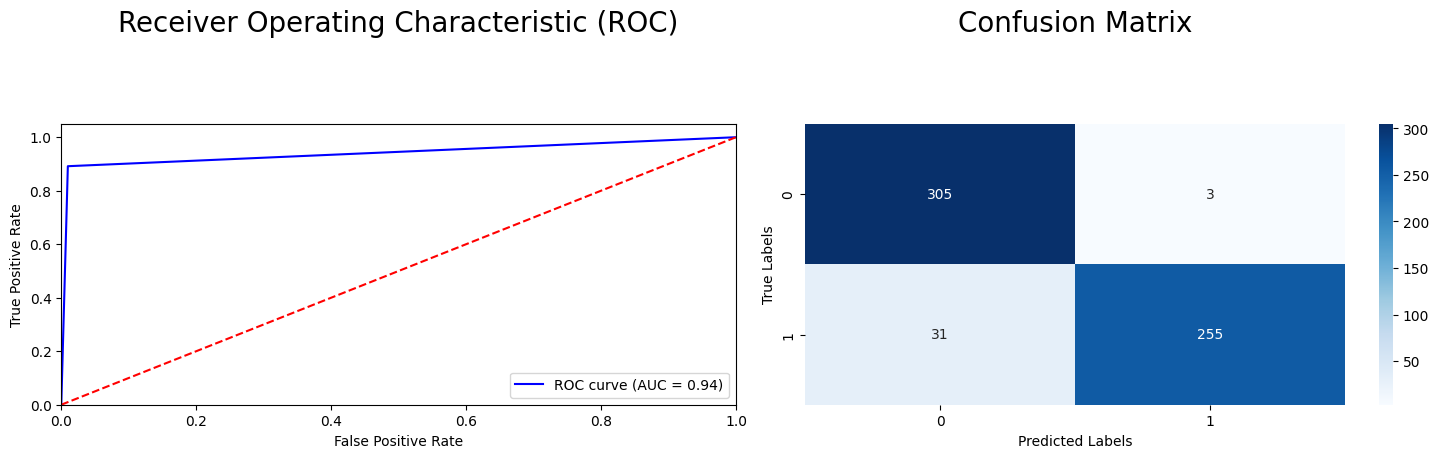

In [ ]:
plot_metrics(ytest, pred)

Visualize the process

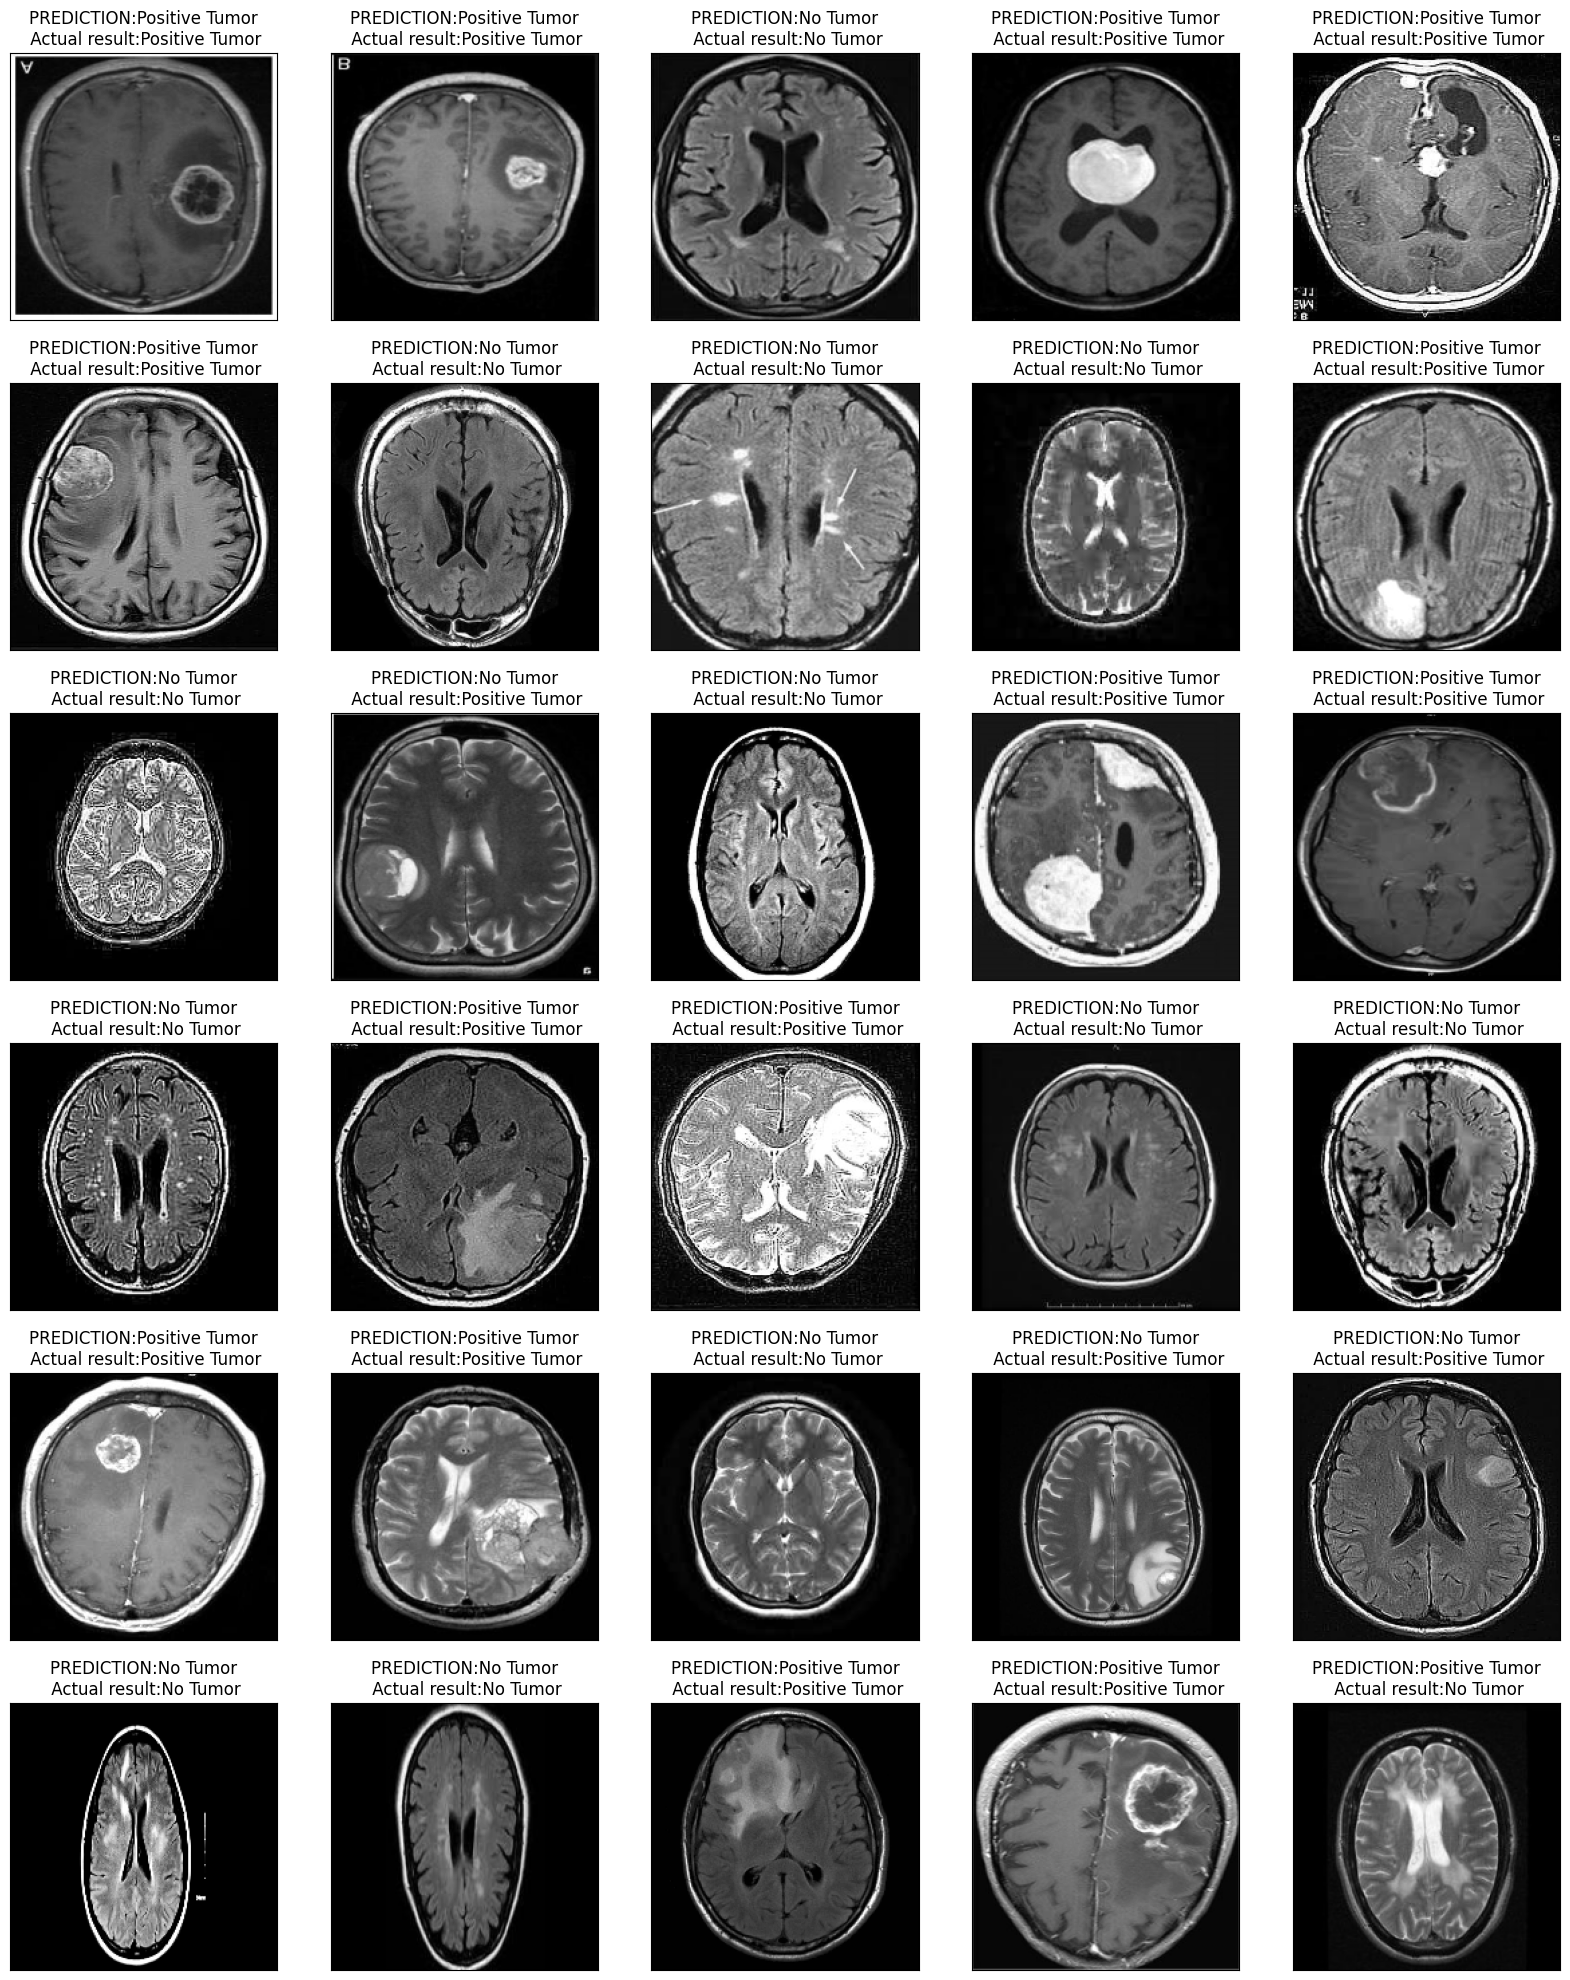

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}
fig, axes = plt.subplots(nrows=6,
                         ncols=5,
                         figsize=(20, 25),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
       img1 = test_x[i].reshape(1,-1)/255
       p = knn_model.predict(img1)
       ax.imshow(test_x[i],cmap='gray')
       ax.set_title(f"PREDICTION:{dec[p[0]]}\n Actual result:{dec[test_y[i]]}")

**Naive Bayes**

Training and getting report

In [ ]:
from sklearn.naive_bayes import GaussianNB
# train the dataset
nb_model = GaussianNB()
nb_model = nb_model.fit(xtrain, ytrain)
# Prediction
pred = nb_model.predict(xtest)

Confusion matrix, Classification report, ROC curves


               precision    recall  f1-score   support

           0       0.69      0.76      0.72       308
           1       0.71      0.62      0.66       286

    accuracy                           0.70       594
   macro avg       0.70      0.69      0.69       594
weighted avg       0.70      0.70      0.69       594
 
 ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________ 




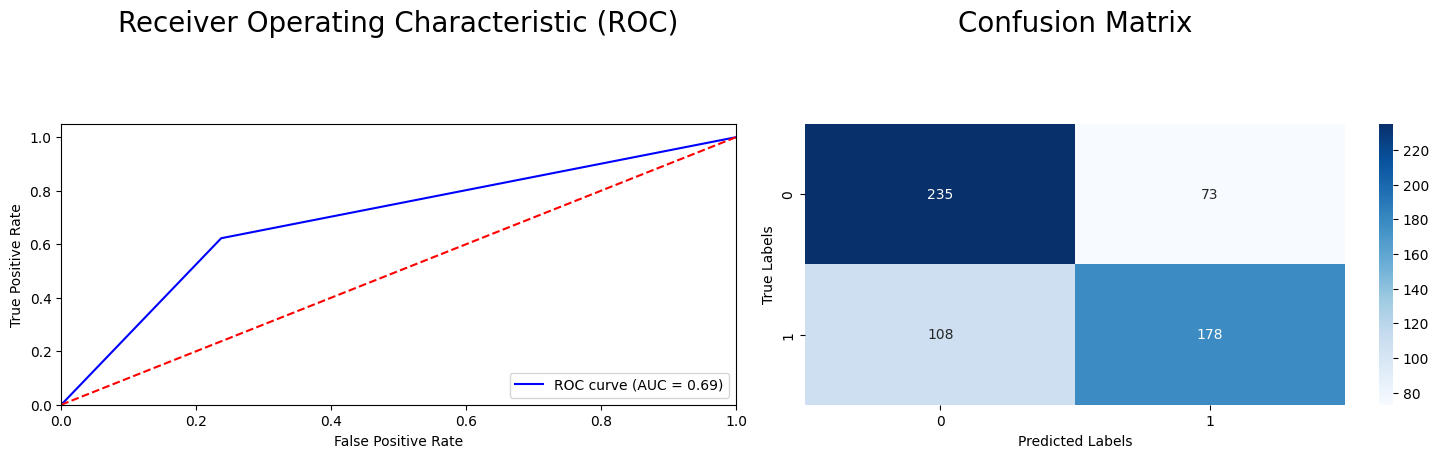

In [ ]:
plot_metrics(ytest,pred)

Visualize the process

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}
fig, axes = plt.subplots(nrows=6,
                         ncols=5,
                         figsize=(20, 25),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
       img1 = test_x[i].reshape(1,-1)/255
       p = nb_model.predict(img1)
       ax.imshow(test_x[i],cmap='gray')
       ax.set_title(f"PREDICTION:{dec[p[0]]}\n Actual result:{dec[test_y[i]]}")

**Neural Networks**

Plot function

In [ ]:
def plot_history(history):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # Create a figure with 1 row and 3 columns
    # Plot the first graph on the first axis (axs[0])
    axs[0].plot(history.history['loss'], label='loss')
    axs[0].plot(history.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Binary crossentropy')
    axs[0].grid(True)
    # Plot the second graph on the second axis (axs[1])
    axs[1].plot(history.history['accuracy'], label='accuracy')
    axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].grid(True)
    # Plot the third graph on the third axis (axs[2])
    summary = pd.DataFrame(history.history)
    summary.plot(ax=axs[2])
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()  # Display the figure

Train function

In [ ]:
import tensorflow as tf
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(None,40000)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model, history

Finding best combination for least value loss by training

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=10
dropout_prob = 0
for num_nodes in [32, 64]:
    for lr in [0.01, 0.001]:
      for batch_size in [32, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(xtrain, ytrain, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)

        results = model.evaluate(xtest, ytest,verbose=0)
        print("LOSS:  " + "%.4f" % results[0])
        print("ACCURACY:  " + "%.2f" % results[1])
        val_loss = results[0]
        print("_"*230,'\n\n\n')
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
Model_Results = least_loss_model.evaluate(xtest,ytest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

19/19 [==============================] - 0s 13ms/step - loss: 0.1607 - accuracy: 0.9411
LOSS:  0.1607
ACCURACY:  0.94


Confusion matrix, Classification report, ROC curves

19/19 [==============================] - 0s 14ms/step

               precision    recall  f1-score   support

           0       0.94      0.94      0.94       308
           1       0.94      0.94      0.94       286

    accuracy                           0.94       594
   macro avg       0.94      0.94      0.94       594
weighted avg       0.94      0.94      0.94       594
 
 ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________ 




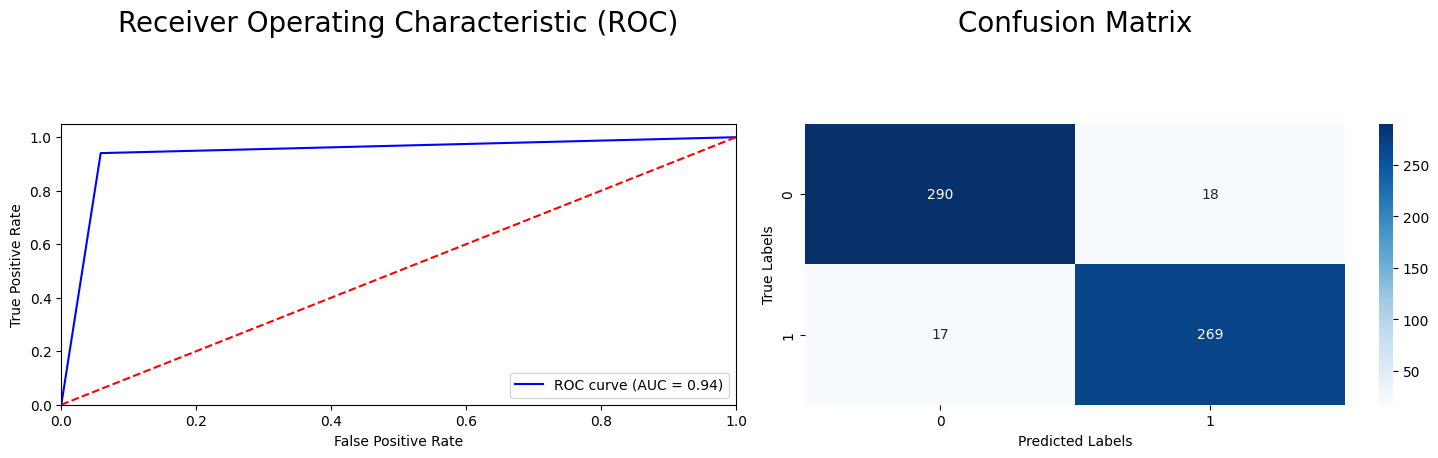

In [ ]:
y_pred = least_loss_model.predict(xtest)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
plot_metrics(ytest, y_pred)

Visualize the process

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}
fig, axes = plt.subplots(nrows=6,
                         ncols=5,
                         figsize=(20, 25),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
       img = test_x[i].reshape(1,-1)/255
       p = (least_loss_model.predict(img,verbose = 0)> 0.5).astype(int)
       ax.imshow(test_x[i],cmap='gray')
       ax.set_title(f"PREDICTION:{dec[p[0][0]]}\n Actual result:{dec[test_y[i]]}")

**Random Forest**

Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)

Confusion matrix, Classification report, ROC curves

In [ ]:
plot_metrics(ytest,y_pred)

Visualize the process

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

fig, axes = plt.subplots(nrows=6,
                         ncols=5,
                         figsize=(20, 25),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
       img1 = test_x[i].reshape(1,-1)/255
       p = rf.predict(img1)
       ax.imshow(test_x[i],cmap='gray')
       ax.set_title(f"PREDICTION:{dec[p[0]]}\n Actual result:{dec[test_y[i]]}")


**K-means Clustering**

Training

In [ ]:
from sklearn.cluster import KMeans

# Scaling the dataset (but here we use all the dataset not only train)
scaler = preprocessing.MinMaxScaler()
data_x = scaler.fit_transform(data_x_updated)
k = 2  # Number of clusters (normal and tumor)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_x)
y_pred = kmeans.labels_

Confusion matrix, Classification report, ROC curves


               precision    recall  f1-score   support

           0       0.64      0.75      0.69      1487
           1       0.70      0.58      0.63      1483

    accuracy                           0.66      2970
   macro avg       0.67      0.66      0.66      2970
weighted avg       0.67      0.66      0.66      2970
 
 ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________ 




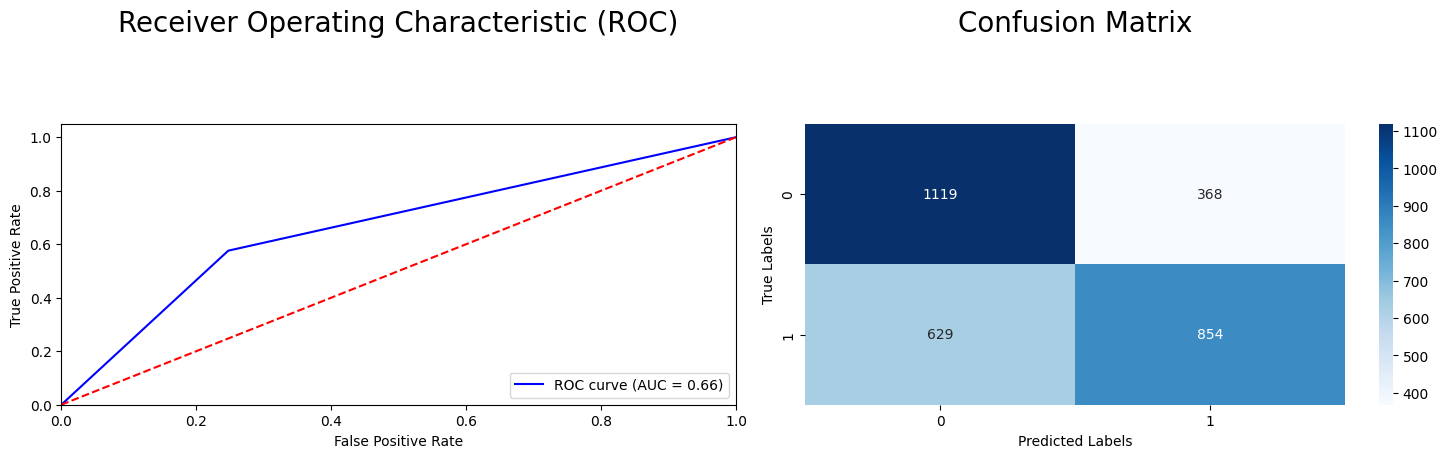

In [ ]:
plot_metrics(data_y,y_pred)

Visualize the process

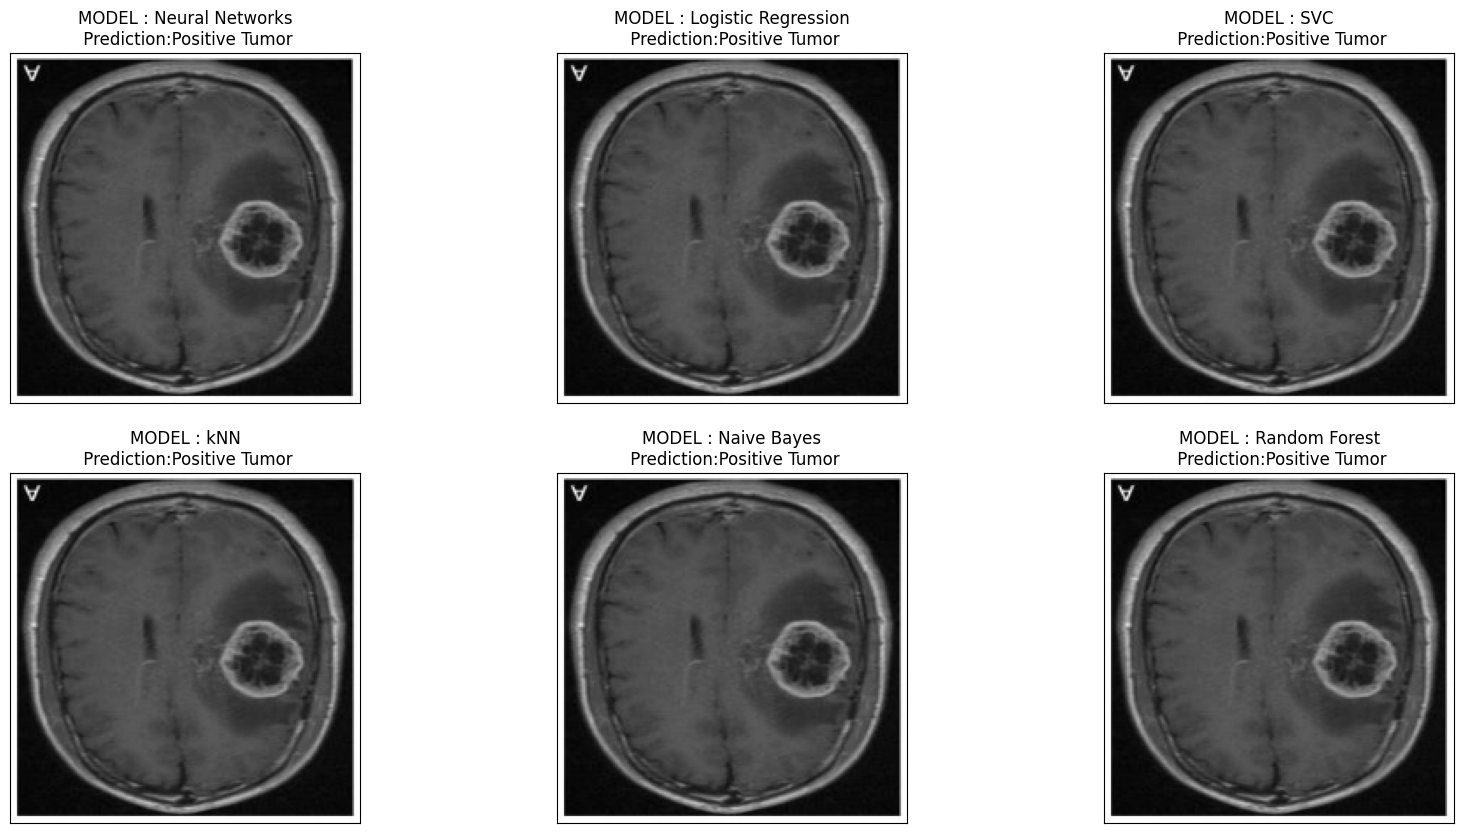

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}
index = 0
img = test_x[index].reshape(1,-1)/255
p_nn = (least_loss_model.predict(img,verbose = 0)> 0.5).astype(int)[0]
p_lg = lg.predict(img)
p_sv = sv.predict(img)
p_knn = knn_model.predict(img)
p_nb = nb_model.predict(img)
p_rf = rf.predict(img)
models = ['Neural Networks','Logistic Regression','SVC','kNN','Naive Bayes','Random Forest']
results = [p_nn,p_lg,p_sv,p_knn,p_nb,p_rf]

fig, axes = plt.subplots(nrows=2,
                         ncols=3,
                         figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
       ax.imshow(test_x[index],cmap='gray')
       ax.set_title(f"MODEL : {models[i]}\n Prediction:{dec[results[i][0]]}")